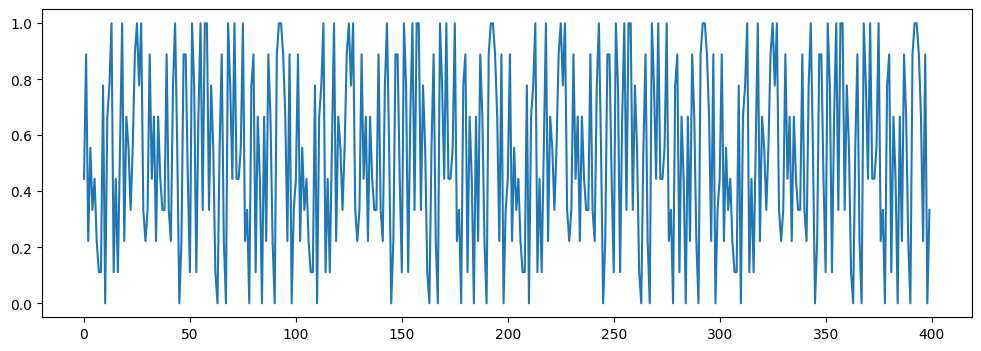

In [27]:
# Importamos los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import datetime

# Store the first 1000 digits of pi
pi = (
    "14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989"
)

# Use the first 100 digits for the random number sequence
pi = pi[:100]
pi[:10]
# Generate seed
seed = int(str(dt.datetime.now().microsecond)[:2])
#seed = 998  # this should be an index from 0 to len(pi)-1
# Sequence size
size = 400
sequence = [int(pi[seed])]
for i in range(size-1):
    seed += 1
    if seed >= len(pi):
        seed = 0
    sequence += [int(pi[seed])]
seed, sequence
plt.figure(figsize=(12,4))
plt.plot(np.array(sequence)/np.array(sequence).max())

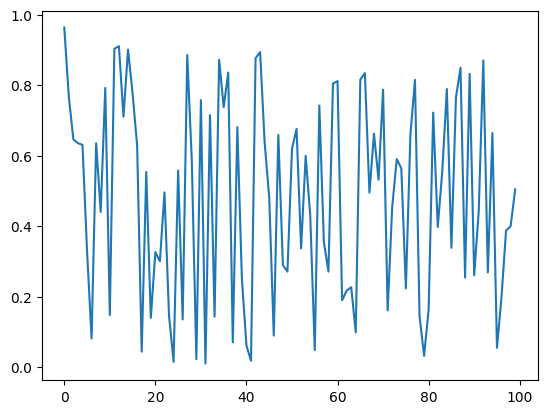

In [2]:
plt.plot(np.random.random(size=100))

### Linear congruential generator

- Try to implement a linear congruential generator (LCG): 
  - See: https://drive.google.com/file/d/0B-dmEvN59Z2Zd3REcHJEdldicTQ/view

- LCG: $X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

  - $a$: multiplier
  - $c$: increment
  - $m$: modulus
  - $X_0$: seed

**LCG Theorem:**

1. $m$ and $c$ are relatively prime
2. $a-1$ is divisible by every prime factor of $m$
3. If $m$ is a multiple of 4, then $a-1$ is a multiple of $4$.

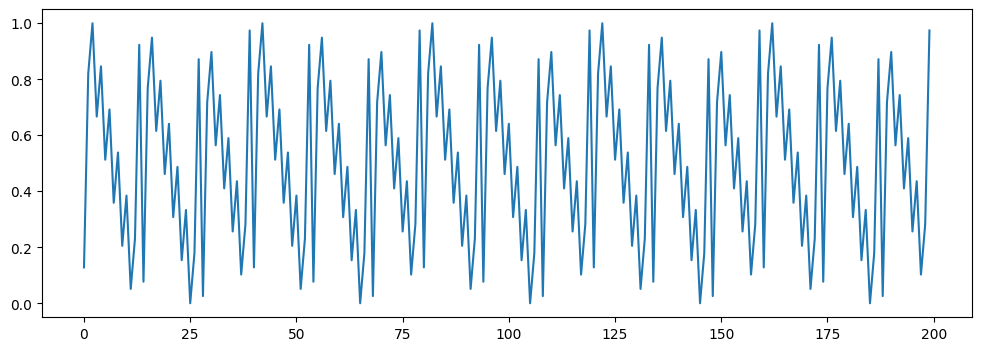

In [36]:
X = [5]
size = 200
a = 21
m = 40
c = 7
for i in range(size-1):
    X += [(a*X[-1] + c)%m]
X = np.array(X) / (m-1)
plt.figure(figsize=(12,4))
plt.plot(X)

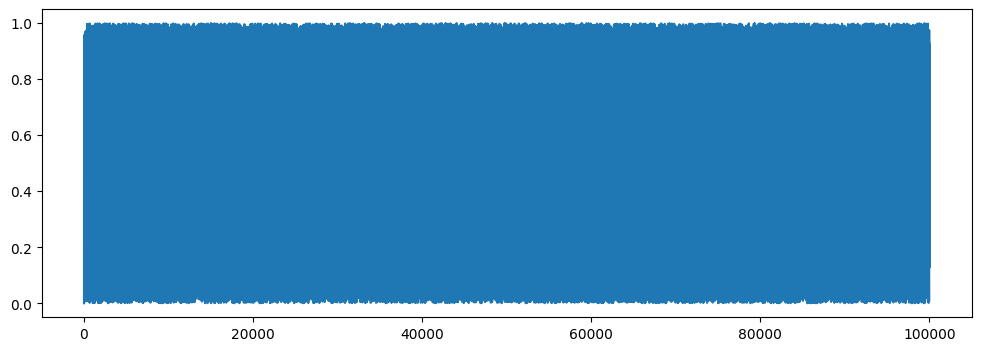

In [47]:
m = 2**32
a = 1103515245 
c = 12345

X0 = 5  # seed
X0 = dt.datetime.now().microsecond
X = [X0]

size = 100000

for i in range(size-1):
    X += [(a*X[-1] + c)%m]
X = np.array(X) / (m-1)
plt.figure(figsize=(12,4))
plt.plot(X)

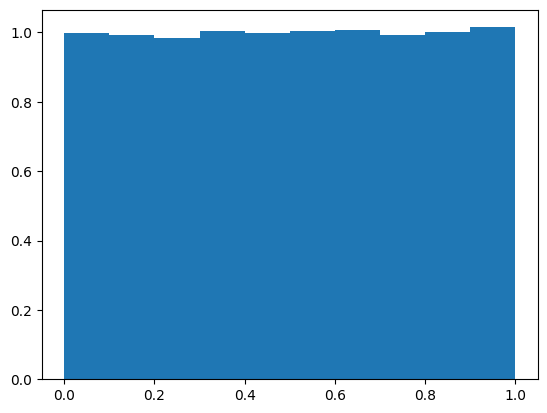

In [48]:
h = plt.hist(X, density=True)

In [64]:
personas = 12
cumples = [int(np.random.random()*366) for i in range(personas)]
cumples, np.unique(cumples, return_counts=True)

([89, 201, 47, 150, 13, 197, 361, 201, 79, 18, 48, 328],
 (array([ 13,  18,  47,  48,  79,  89, 150, 197, 201, 328, 361]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])))

In [76]:
def simulate_birthday(personas, nsims=1000):
    repite = 0
    for si in range(nsims):
        cumples = [int(np.random.random()*366) for i in range(personas)]
        if len(np.where(np.unique(cumples, return_counts=True)[1] > 1)[0])>0:
            repite += 1
    return repite / nsims

simulate_birthday(personas=12, nsims=100000)

0.16754

In [79]:
cumples = [simulate_birthday(personas=p, nsims=10000) for p in range(51)]

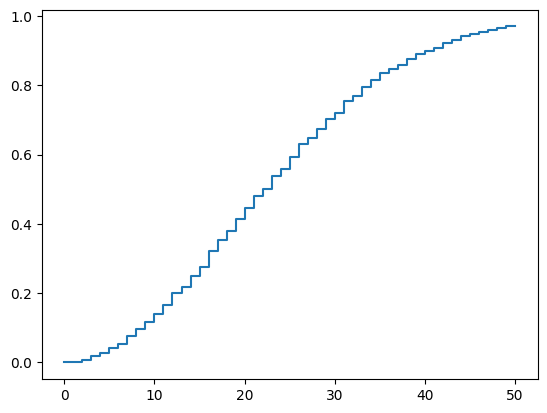

In [80]:
plt.step(range(len(cumples)), cumples)

In [95]:
monedas = 10
nsims = 10

results = []
for si in range(nsims):
    results += [sum([int(np.random.random()*2) for i in range(monedas)])]
results, len(np.where(np.array(results) == monedas // 2)[0])

([6, 5, 7, 5, 5, 4, 5, 2, 6, 4], 4)

In [96]:
monedas = 10
nsims = 1000

results = []
for si in range(nsims):
    results += [sum([int(np.random.random()*2) for i in range(monedas)])]
len(np.where(np.array(results) == monedas // 2)[0])/nsims

0.245

In [97]:
monedas = 100
nsims = 1000

results = []
for si in range(nsims):
    results += [sum([int(np.random.random()*2) for i in range(monedas)])]
len(np.where(np.array(results) == monedas // 2)[0])/nsims

0.074

In [98]:
from scipy.stats import binom

In [100]:
binom.pmf(5, n=10, p=0.5), binom.pmf(50, n=100, p=0.5)

(0.24609375000000003, 0.07958923738717875)

<BarContainer object of 101 artists>

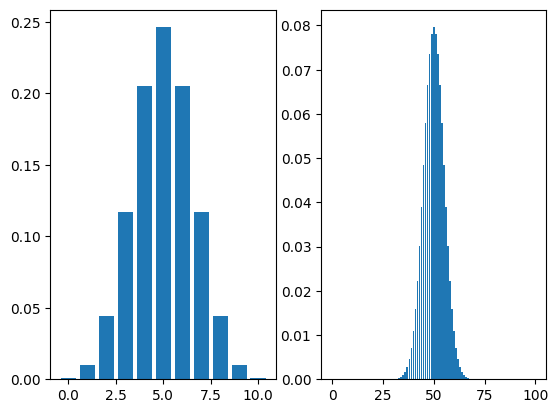

In [104]:
x = np.array(range(11))
plt.subplot(1,2,1)
plt.bar(x, binom.pmf(x, p=0.5, n=10))
plt.subplot(1,2,2)
x = np.array(range(101))
plt.bar(x, binom.pmf(x, p=0.5, n=100))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>